# **Task 1: Student Pass/Fail Prediction**

**Objective:**
Predict whether a student will pass or fail based on their study hours and attendan

## Step 1: Dataset Preparation

Creating a Pass column from GPA:

Using threshold 2.0 (>=2 is pass, <2 is fail)

Pass → 1

Fail → 0

In [ ]:
import pandas as pd

# Load data (replace with actual path if CSV)
df = pd.read_csv("/content/student_data.csv")

# Create Pass/Fail column based on GPA threshold
df['Pass'] = (df['GPA'] >= 2.0).astype(int)

df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,Pass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0,1
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0,1
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0,0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0,1
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0,0


## Step 2: Data Exploration

In [ ]:
# Check for missing values:
df.isnull().sum()

,0
StudentID,0
Age,0
Gender,0
Ethnicity,0
ParentalEducation,0
StudyTimeWeekly,0
Absences,0
Tutoring,0
ParentalSupport,0
Extracurricular,0


In [ ]:
# Summary statistics:
df[['StudyTimeWeekly','Absences','GPA','Pass']].describe()

,StudyTimeWeekly,Absences,GPA,Pass
count,2392.000000,2392.000000,2392.000000,2392.000000
mean,9.771992,14.541388,1.906186,0.467391
std,5.652774,8.467417,0.915156,0.499040
min,0.001057,0.000000,0.000000,0.000000
25%,5.043079,7.000000,1.174803,0.000000
50%,9.705363,15.000000,1.893393,0.000000
75%,14.408410,22.000000,2.622216,1.000000
max,19.978094,29.000000,4.000000,1.000000


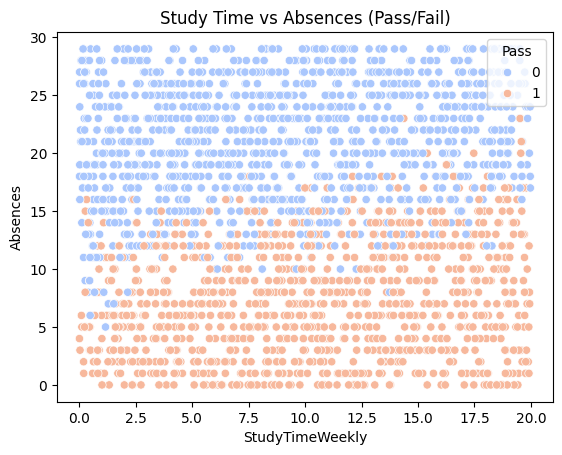

In [ ]:
# Visualize relationships:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df, x='StudyTimeWeekly', y='Absences', hue='Pass', palette='coolwarm')
plt.title("Study Time vs Absences (Pass/Fail)")
plt.show()

This scatter plot shows us that the students with lower absences and higher weekly study time (in hours) are more likely to have passed.

## Step 3: Feature Selection

In [ ]:
# Using StudyTimeWeekly and Absences as the features

X = df[['StudyTimeWeekly', 'Absences']]
y = df['Pass']

## Step 4: Model Training (Logistic Regression)

In [ ]:
# train and test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Model Training

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Step 5: Model Evaluation

Accuracy: 0.9081419624217119


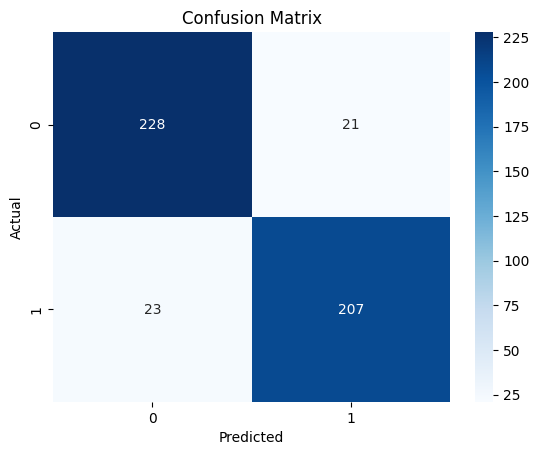

In [ ]:
# Evaluting using accuracy and confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Insights

In [ ]:
# Feature Impact
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
print(coeff_df)

           Feature  Coefficient
0  StudyTimeWeekly     0.195358
1         Absences    -0.610309


Positive coefficient (StudyTimeWeekly in hours) → increases chance of passing

Negative coefficient (Absences) → decreases chance of passing

# **Task 2: Sentiment Analysis with Natural Language Processing**

**Objective:**
Analyze customer reviews to classify sentiments as positive or negative.

### Step 1: Dataset Loading

In [7]:
import pandas as pd

path = "/content/test.ft.txt.bz2"

In [8]:
df = pd.read_csv(path, compression='bz2', delimiter='\t')

In [9]:
df.head()

,"__label__2 Great CD: My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I'm in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life's hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing ""Who was that singing ?"""
0,__label__2 One of the best game music soundtra...
1,__label__1 Batteries died within a year ...: I...
2,"__label__2 works fine, but Maha Energy is bett..."
3,__label__2 Great for the non-audiophile: Revie...
4,__label__1 DVD Player crapped out after one ye...


In [10]:
print("Data shape" ,df.shape)

Data shape (399999, 1)


In [11]:
# Converting data into dataframe.

def prep_data(file):
    data = []
    for index, row in file.iterrows():
        line = row[0]
        label, text = line.split(' ', 1)
        label = label.replace('__label__', '')
        data.append((label, text.strip()))

    cols = ['label', 'review']
    return pd.DataFrame(data, columns=cols)

In [12]:
df = prep_data(df)
df.head()

/tmp/ipython-input-2479565975.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  line = row[0]


,label,review
0,2,One of the best game music soundtracks - for a...
1,1,Batteries died within a year ...: I bought thi...
2,2,"works fine, but Maha Energy is better: Check o..."
3,2,Great for the non-audiophile: Reviewed quite a...
4,1,DVD Player crapped out after one year: I also ...


In [14]:
df.label.value_counts()

,count
label,
1,200000
2,199999


In [18]:
df.label = df.label.replace({'2':'positive', '1':'negative'})

### Step 2: Pre-processing

In [19]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation & special chars
    tokens = nltk.word_tokenize(text)  # Tokenization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lemmatization & stopwords removal
    return " ".join(tokens)

df['Cleaned_Review'] = df['review'].apply(preprocess_text)

In [21]:
df[['review', 'Cleaned_Review']].head()

,review,Cleaned_Review
0,One of the best game music soundtracks - for a...,one best game music soundtrack game didnt real...
1,Batteries died within a year ...: I bought thi...,battery died within year bought charger jul wo...
2,"works fine, but Maha Energy is better: Check o...",work fine maha energy better check maha energy...
3,Great for the non-audiophile: Reviewed quite a...,great nonaudiophile reviewed quite bit combo p...
4,DVD Player crapped out after one year: I also ...,dvd player crapped one year also began incorre...


### Step 3: Text Vectorization (TF-IDF)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Cleaned_Review'])
y = df['label']

### Step 5: Model Training (Logistic Regression)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Step 6: Model Evaluation

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

# pos_label = 1, for positive
print("Precision:", precision_score(y_test, y_pred, pos_label=1))
print("Recall:", recall_score(y_test, y_pred, pos_label=1))
print("F1 Score:", f1_score(y_test, y_pred, pos_label=1))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8889125
Precision: 0.8868606767911025
Recall: 0.891015683719998
F1 Score: 0.8889333250015622

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89     40086
           1       0.89      0.89      0.89     39914

    accuracy                           0.89     80000
   macro avg       0.89      0.89      0.89     80000
weighted avg       0.89      0.89      0.89     80000



### Insights

In [29]:
# Correctly & incorrectly classified examples:

# Correct predictions
correct_preds = df.iloc[y_test.index][y_test == y_pred]
print("\nCorrectly classified reviews:\n", correct_preds[['label', 'Cleaned_Review']].head())

# Incorrect predictions
incorrect_preds = df.iloc[y_test.index][y_test != y_pred]
print("\nIncorrectly classified reviews:\n", incorrect_preds[['label', 'Cleaned_Review']].head())


Correctly classified reviews:
         label                                     Cleaned_Review
225458      1  entertaining reading negative review feel add ...
10463       0  brake easy plastic hindge top fold broke month...
384120      1  flamin must say read zanes writing zane newbie...
169115      1  ballet beautiful great product easy learn make...
310249      0  couldnt get third description hero cornflower ...

Incorrectly classified reviews:
         label                                     Cleaned_Review
242139      1  book still get five star one frey read book ye...
366647      0  plenty cusion leather hard rockport year pair ...
250176      0  worth buy using mouse almost week first day go...
235760      1  ipod classic spite belkins website bought one ...
91652       0  interesting book tedious dated first good m ha...


In [30]:
# Common words in positive/negative reviews:

import numpy as np

feature_names = np.array(vectorizer.get_feature_names_out())
coef = model.coef_[0]

top_positive_words = feature_names[np.argsort(coef)][-10:]
top_negative_words = feature_names[np.argsort(coef)][:10]

print("Top words for positive reviews:", top_positive_words)
print("Top words for negative reviews:", top_negative_words)

Top words for positive reviews: ['complaint' 'fantastic' 'amazing' 'wonderful' 'love' 'best' 'awesome'
 'perfect' 'excellent' 'great']
Top words for negative reviews: ['disappointing' 'worst' 'waste' 'disappointment' 'disappointed' 'poor'
 'boring' 'terrible' 'poorly' 'horrible']
